# Introduction
Project available at https://github.com/zalandoresearch/fashion-mnist

In [0]:
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


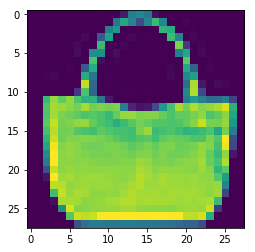

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[100])
plt.show()

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images_scaled = train_images /255
test_images_scaled = test_images /255
train_images_scaled = train_images_scaled.reshape(60000,28,28,1)
test_images_scaled = test_images_scaled.reshape(10000,28,28,1)

In [0]:
model = tf.keras.models.Sequential ()
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

W0707 16:16:37.504084 140610204755840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
class my_callback (tf.keras.callbacks.Callback) :
    def on_epoch_end (self, epoch, logs={}):
        if (logs.get('loss')<0.1):
            print ('Loss reduced substantially, stopping training')
            self.model.stop_training=True
            
callback = my_callback()
model.fit (train_images_scaled, train_labels, epochs=25, callbacks=[callback])
model.evaluate(test_images_scaled, test_labels)

Epoch 1/25
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4352 - acc: 0.8417
Epoch 2/25
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2919 - acc: 0.8937
Epoch 3/25
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2479 - acc: 0.9091
Epoch 4/25
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2174 - acc: 0.9208
Epoch 5/25
60000/60000 [==============================] - 7s 108us/sample - loss: 0.1907 - acc: 0.9290
Epoch 6/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1685 - acc: 0.9370
Epoch 7/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1475 - acc: 0.9448
Epoch 8/25
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1296 - acc: 0.9504
Epoch 9/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1134 - acc: 0.9577
Epoch 10/25
60000/60000 [==============================] - 6s 108us/samp

[0.3263276228234172, 0.9149]

In [0]:
print (model.predict(test_images[10].reshape(1, 28,28)))
print (test_labels[10])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
